In [1]:
from display import display_figures
from display.display_figures_by_county import display_connect_structure, display_spatCorrLevels, display_spatCorr_onR

from include.build_synth import buildData_fromRO as build
from include.build_synth import load_RO as load

from include.build_synth.Tikhonov_method import Tikhonov_spat_corr
from include.build_synth.compute_spatCorrLevels import compute_spatCorrLevels

## Univariate synthetic infection counts

### Load ground truth univariate reproduction number $\boldsymbol{\mathsf{R}}^\star$ and reporting errors $\boldsymbol{\mathsf{O}}^\star$
Here is the list of the configurations available in [data/Synthetic/Univariate](data/Synthetic/Univariate), giving ground truths for R and O for each.
* Configuration `'I'`&ensp;&ensp;&ensp;: faster dynamic changes and a lot of outliers
* Configuration `'II'`&ensp;&ensp;: slower dynamic changes and fewer outliers
* Configuration `'III'`&ensp;: faster dynamic changes and fewer outliers
* Configuration `'IV'`&ensp;&ensp;: slower dynamic changes and a lot of outliers

In [2]:
# Choice of configuration
configuration = 'I'

RTrue, OTrue = load.loadROconfig(configuration)

### Building synthetic data following Cori's extended model
Given `firstCases` initial number of cases for day 1, loaded $\mathsf{R}^{\mathsf{true}}$ and $\mathsf{O}^{\mathsf{true}}$, build synthetic dates `datesBuilt` and data $\mathsf{Z}$ (`ZDataBuilt`) drawn following Cori's extended model:

For each day $t$, $\mathsf{Z}_t$ is drawn according to a Poisson law of parameter $\mathsf{R}^{\mathsf{true}}_t.(\Phi\star\mathsf{Z})_t + \mathsf{O}^{\mathsf{true}}_t$ where $\Phi$ is the contagiosity.

C:\Users\juliana\Documents\GitHub\Covid-R-estim\display\display_figures.py:211: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


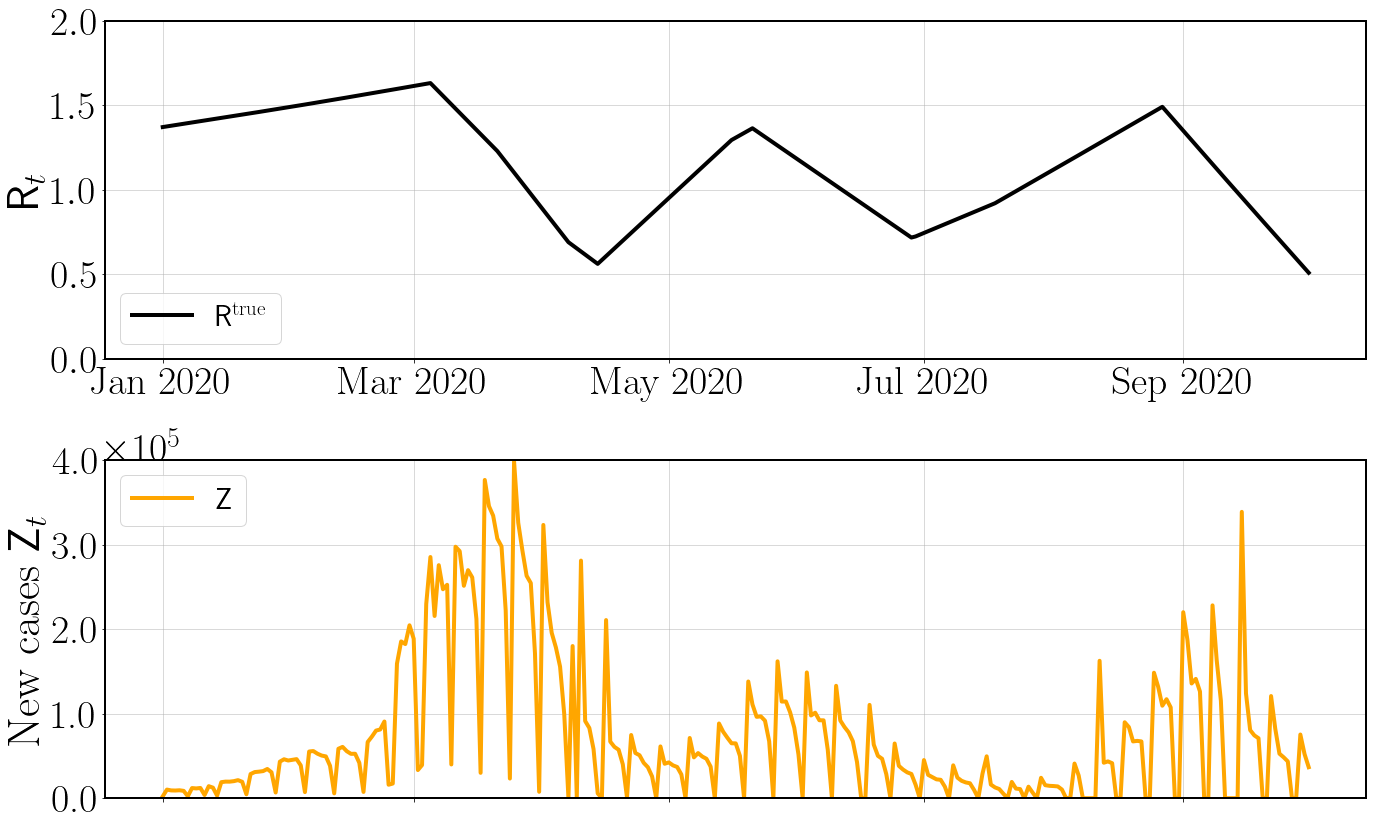

In [3]:
# Choice of number of first cases on day one
firstCases1D = 2000

# Build synthetic data based on RTrue, OTrue and chosen firstCases
datesBuilt, ZDataBuilt = build.buildData_anyRO(RTrue, OTrue, firstCases1D)

# Display data built
fig, axes, formattedDatesBuilt = display_figures.display_dataBuilt(datesBuilt, ZDataBuilt, RTrue, OTrue)

## Multivariate synthetic infection counts

### Load synthetic reproduction number $\boldsymbol{\mathsf{R}}^\dagger$
Here is the list of the configurations available in data/Synthetic/Multivariate, giving ground truth for R and O for each.
    - `connectStruct = 'Line'` connectivity structure
    - `connectStruct = 'Hub'` connectivity structure
each containing configurations associated to various inter-county correlated ground truth $\boldsymbol{\mathsf{R}}^\star$.

C:\Users\juliana\Documents\GitHub\Covid-R-estim\display\display_figures_by_county.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


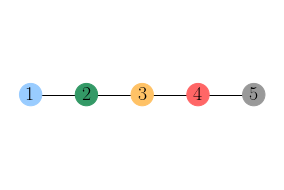

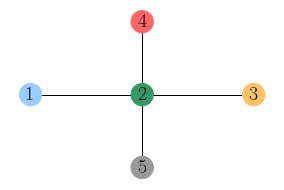

In [4]:
display_connect_structure('Line')
display_connect_structure('Hub')

In [5]:
# Choice of connectivity structure and spatial correlation level (configMulti) for multivariate synthetic infection counts
connectStruct = 'Line'

### $\boldsymbol{\mathsf{R}}^\star$ and $\boldsymbol{\mathsf{O}}^\star$
Given $\boldsymbol{\mathsf{R}}^\dagger$ found in `Config_delta_0'`&ensp; they are computed via a Tikhonov regularization as:

$$\boldsymbol{\mathsf{R}}^\star (\boldsymbol{\mathsf{R}}^\dagger; \delta) = \underset{\boldsymbol{\mathsf{R}} \in \mathbb{R}^{C\times T}}{\mathrm{argmin}} \, \lVert \boldsymbol{\mathsf{R}}^\dagger - \boldsymbol{\mathsf{R}}\rVert_2^2 +  \delta  \lVert \mathsf{G} \boldsymbol{\mathsf{R}}\rVert_2^2$$

and storaged in `Config_delta_I'`&ensp; `Config_delta_II'`&ensp; `Config_delta_III'`&ensp; `Config_delta_IV'`&ensp; respectively corresponding to $\delta_{\mathtt{I}}$, $\delta_{\mathtt{II}}$, $\delta_{\mathtt{III}}$, $\delta_{\mathtt{IV}}$ defined in the associated article. Each of their value can be found in their associated `.mat` file, using the key `deltaValue`.

C:\Users\juliana\Documents\GitHub\Covid-R-estim\display\display_figures_by_county.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


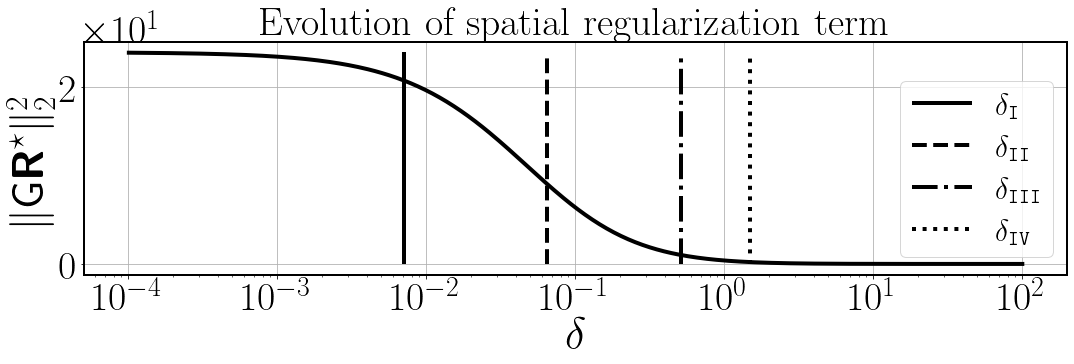

In [6]:
# Adding inter-county correlations to initial realistic univariate R crafted on each county.
R_by_county, O_by_county, firstCasesExample, B_matrix = load.loadROconfigMulti(connectStruct, '0')

# Inter-county correlation levels computation
display_spatCorrLevels(R_by_county, B_matrix, fileSuffix=connectStruct)

Computing diffusion with deltaS = 0.00 ----
Computing diffusion with deltaS = 0.01 ----
Computing diffusion with deltaS = 0.06 ----
Computing diffusion with deltaS = 0.51 ----
Computing diffusion with deltaS = 1.49 ----


C:\Users\juliana\Documents\GitHub\Covid-R-estim\display\display_figures_by_county.py:146: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


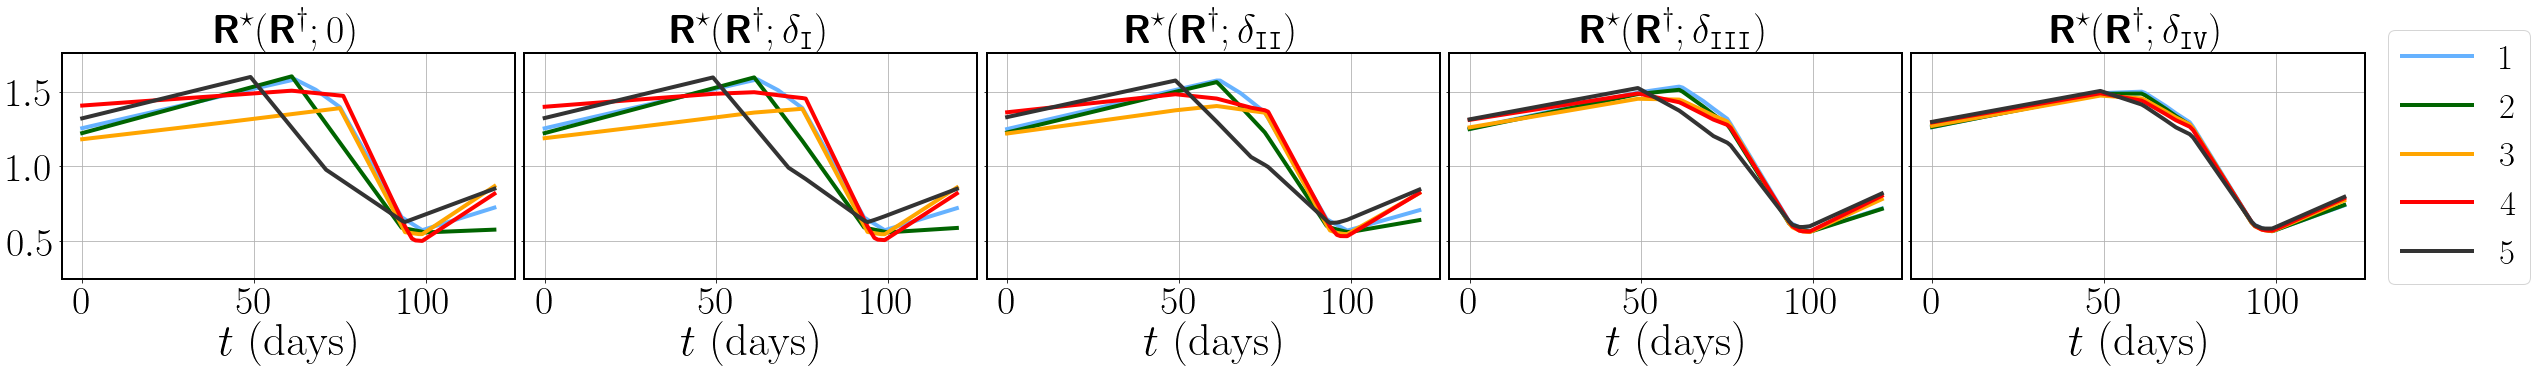

In [7]:
# Visualization of inter-county correlation levels
delta_I, delta_II, delta_III, delta_IV = compute_spatCorrLevels(R_by_county, B_matrix, fileSuffix=connectStruct)
deltaList = {'0': 0,
             'I': delta_I,
             'II': delta_II,
             'III': delta_III,
             'IV': delta_IV}

display_spatCorr_onR(R_by_county, B_matrix, deltaList)

In [8]:
# Build synthetic infection counts based on RTrue, OTrue and chosen firstCases for ONE CONFIGURATION
configMulti = 'I'
R_spat_corr = Tikhonov_spat_corr(R_by_county, B_matrix, delta=deltaList[configMulti])

firstCasesMulti = firstCasesExample  # can be modified if needed
datesBuilt, ZDataBuilt = build.buildDataMulti_anyRO(R_spat_corr, O_by_county, firstCasesMulti)

In [9]:
# Display synthetic infection counts crafted with previous configuration -------------- (WIP)
# fig, axes, formattedDatesBuilt = display_figures.display_dataBuilt(datesBuilt, ZDataBuilt, RTrue, OTrue)